In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
## import data
data = pd.read_csv('PTSD_final.csv', index_col=0)
data = data.drop(columns=['dob','date_sefla'])
#convert the control and sex to 0 and 1
data['condition'] = data['condition'].map({'sefl': 1, 'control':0})
data['sex'] = data['sex'].map({'male': 1, 'female':0})
data.drop(columns=(['date_recall5', 'freezing_recall5']), inplace=True)
data.dropna(inplace=True)
data

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,condition,sex,age_selfa
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,6.61,21.0,0,1,71
1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,2.24,21.0,0,1,71
2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,7.30,21.0,0,1,71
3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,14.89,21.0,0,1,71
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,5.62,21.0,1,1,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,33.71,30.0,1,1,91
70,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,56.43,30.0,1,1,91
71,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,15.14,30.0,1,1,91
72,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,53.20,30.0,1,1,91


In [36]:
data_control = data[data['condition'] == 0] 
data_sefl = data[data['condition'] == 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


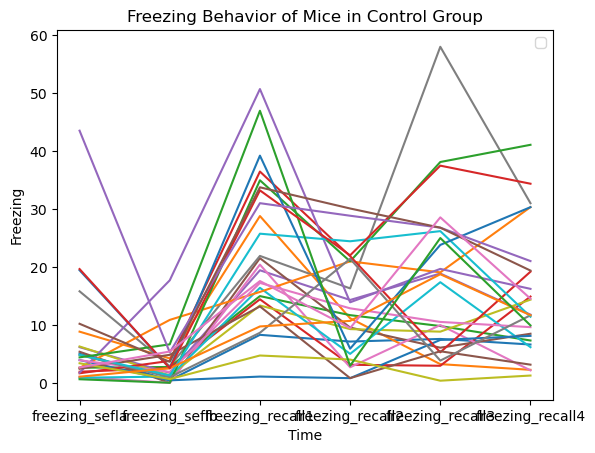

In [37]:
X_control = data_control.drop(columns=['condition'])
# Extract the freezing columns for visualization
freezing_columns = ['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']
# Plotting each mouse as a line
for index, row in X_control.iterrows():
    plt.plot(freezing_columns, row[freezing_columns])
# Set the x-axis label
plt.xlabel('Time')
# Set the y-axis label
plt.ylabel('Freezing')
# Set the title of the plot
plt.title('Freezing Behavior of Mice in Control Group')
# Add a legend
plt.legend()
# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


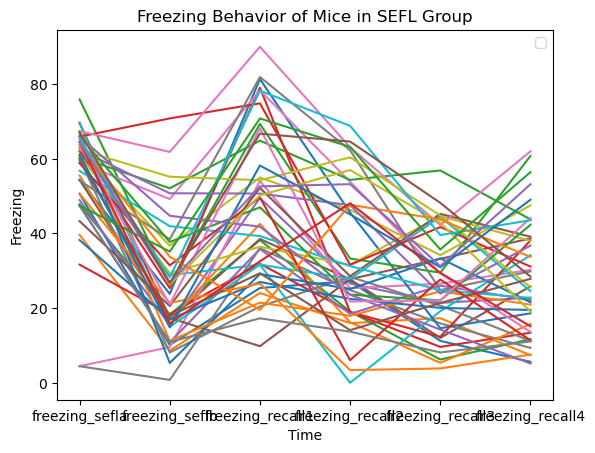

In [38]:
X_sefl = data_sefl.drop(columns=['condition'])
# Extract the freezing columns for visualization
freezing_columns = ['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']
# Plotting each mouse as a line
for index, row in X_sefl.iterrows():
    plt.plot(freezing_columns, row[freezing_columns])
# Set the x-axis label
plt.xlabel('Time')
# Set the y-axis label
plt.ylabel('Freezing')
# Set the title of the plot
plt.title('Freezing Behavior of Mice in SEFL Group')
# Add a legend
plt.legend()
# Show the plot
plt.show()

## K-means 2 cluster for sefl

In [39]:
y_sefl = data_sefl['freezing_recall4']
X_sefl = data_sefl.drop(columns=['freezing_recall4','cohort_id'])
#convert X to float type
X_sefl = X_sefl.astype(float)
# convert y into 6 classes, 0-10->0, 10-20->1, 20-30->2, 30-40->3, 40-50->4, 50-65->5
y_sefl = pd.cut(y_sefl, bins=[0,30,65], labels=[0,1])
y_sefl = y_sefl.astype(int)

## split the data into training and testing
from sklearn.model_selection import train_test_split
X_sefl_train, X_sefl_test, y_sefl_train, y_sefl_test = train_test_split(X_sefl, y_sefl, test_size=0.2, random_state=42)

In [40]:
# use K-means and find the accuracy
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_sefl_train)
y_pred = kmeans.predict(X_sefl_test)
accuracy_KM_sefl = accuracy_score(y_sefl_test, y_pred)
print('The accuracy of K-means is:', accuracy_KM_sefl)

The accuracy of K-means is: 0.8


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## K-means 2 cluster for control

In [41]:
y_control = data_control['freezing_recall4']
X_control = data_control.drop(columns=['freezing_recall4','cohort_id'])
X_control = X_control.astype(float)
y_control = pd.cut(y_control, bins=[0,30,65], labels=[0,1])
y_control = y_control.astype(int)

X_control_train, X_control_test, y_control_train, y_control_test = train_test_split(X_control, y_control, test_size=0.2, random_state=42)

In [42]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_control_train)
y_pred = kmeans.predict(X_control_test)
accuracy_KM_control = accuracy_score(y_control_test, y_pred)
print('The accuracy of K-means is:', accuracy_KM_control)

The accuracy of K-means is: 0.16666666666666666


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


EM algorithm

In [43]:
## em algorithm
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2, random_state=0).fit(X_sefl_train)
y_pred = em.predict(X_sefl_test)
accuracy_EM_sefl = accuracy_score(y_sefl_test, y_pred)
print('The accuracy of EM is:', accuracy_EM_sefl)

The accuracy of EM is: 1.0


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
## for control group
em = GaussianMixture(n_components=2, random_state=0).fit(X_control_train)
y_pred = em.predict(X_control_test)
accuracy_EM_control = accuracy_score(y_control_test, y_pred)
print('The accuracy of EM is:', accuracy_EM_control)

The accuracy of EM is: 0.3333333333333333


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Hierarchical clustering

In [45]:
## Hierarchical clustering for control group
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering(n_clusters=2).fit(X_control_train)
y_pred = hier.fit_predict(X_control_test)
accuracy_HC_control = accuracy_score(y_control_test, y_pred)
print('The accuracy of Hierarchical Clustering is:', accuracy_HC_control)

The accuracy of Hierarchical Clustering is: 0.6666666666666666


In [46]:
##  Hierarchical clustering for SEFL group
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=2).fit(X_sefl_train)
y_pred = hierarchical.fit_predict(X_sefl_test)
accuracy_HC_sefl = accuracy_score(y_sefl_test, y_pred)
print('The accuracy of Hierarchical Clustering is:', accuracy_HC_sefl)

The accuracy of Hierarchical Clustering is: 0.0


## doing this after PCA

In [47]:
## pca
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # only 4 can produce nice accuracy in control group, however, changing the n_components seems have no effect on the accuracy of sefl group
X_sefl_pca = pca.fit_transform(X_sefl)
X_control_pca = pca.fit_transform(X_control)
X_sefl_pca_train, X_sefl_pca_test, y_sefl_train, y_sefl_test = train_test_split(X_sefl_pca, y_sefl, test_size=0.2, random_state=42)
X_control_pca_train, X_control_pca_test, y_control_train, y_control_test = train_test_split(X_control_pca, y_control, test_size=0.2, random_state=42)

## Kmeans 2 cluster

In [48]:
##sefl group
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_sefl_pca_train)
y_pred = kmeans.predict(X_sefl_pca_test)
accuracy_pca_KM_sefl = accuracy_score(y_sefl_test, y_pred)
print('The accuracy of K-means is:', accuracy_pca_KM_sefl)

The accuracy of K-means is: 0.8


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
## control group
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_control_pca_train)
y_pred = kmeans.predict(X_control_pca_test)
accuracy_pca_KM_control = accuracy_score(y_control_test, y_pred)
print('The accuracy of K-means is:', accuracy_KM_control)

The accuracy of K-means is: 0.16666666666666666


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


only 4 can produce nice accuracy in control group, however, changing the n_components seems have no effect on the accuracy of sefl group

### EM

In [50]:
## for control group
em = GaussianMixture(n_components=2, random_state=0).fit(X_control_pca_train)
y_pred = em.predict(X_control_pca_test)
accuracy_pca_EM_control = accuracy_score(y_control_test, y_pred)
print('The accuracy of EM is:', accuracy_pca_EM_control)

The accuracy of EM is: 0.3333333333333333


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
## for sefl group
em = GaussianMixture(n_components=2, random_state=0).fit(X_sefl_pca_train)
y_pred = em.predict(X_sefl_pca_test)
accuracy_pca_EM_sefl = accuracy_score(y_sefl_test, y_pred)
print('The accuracy of EM is:', accuracy_pca_EM_sefl)

The accuracy of EM is: 0.8


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## HC

In [52]:
## hierarchical clustering for control group
hier = AgglomerativeClustering(n_clusters=2).fit(X_control_pca_train)
y_pred = hier.fit_predict(X_control_pca_test)
accuracy_pca_HC_control = accuracy_score(y_control_test, y_pred)
print('The accuracy of Hierarchical Clustering is:', accuracy_pca_HC_control)

The accuracy of Hierarchical Clustering is: 0.6666666666666666


In [53]:
## hierarchical clustering for sefl group
hier = AgglomerativeClustering(n_clusters=2).fit(X_sefl_pca_train)
y_pred = hier.fit_predict(X_sefl_pca_test)
accuracy_pca_HC_sefl = accuracy_score(y_sefl_test, y_pred)
print('The accuracy of Hierarchical Clustering is:', accuracy_pca_HC_sefl)

The accuracy of Hierarchical Clustering is: 0.0


# visualization

In [55]:
## list of accuracy for all methods
accuracy_control_list = [accuracy_KM_control, accuracy_EM_control, accuracy_HC_control]
accuracy_sefl_list = [accuracy_KM_sefl, accuracy_EM_sefl, accuracy_HC_sefl]
accuracy_pca_control_list = [accuracy_pca_KM_control, accuracy_pca_EM_control, accuracy_pca_HC_control]
accuracy_pca_sefl_list = [accuracy_pca_KM_sefl, accuracy_pca_EM_sefl, accuracy_pca_HC_sefl]

accuracy_df = pd.DataFrame({'control': accuracy_control_list, 'sefl': accuracy_sefl_list, 'pca_control': accuracy_pca_control_list, 'pca_sefl': accuracy_pca_sefl_list})
accuracy_df.index = ['K-means', 'EM', 'Hierarchical Clustering']
accuracy_df

,control,sefl,pca_control,pca_sefl
K-means,0.166667,0.8,0.833333,0.8
EM,0.333333,1.0,0.333333,0.8
Hierarchical Clustering,0.666667,0.0,0.666667,0.0


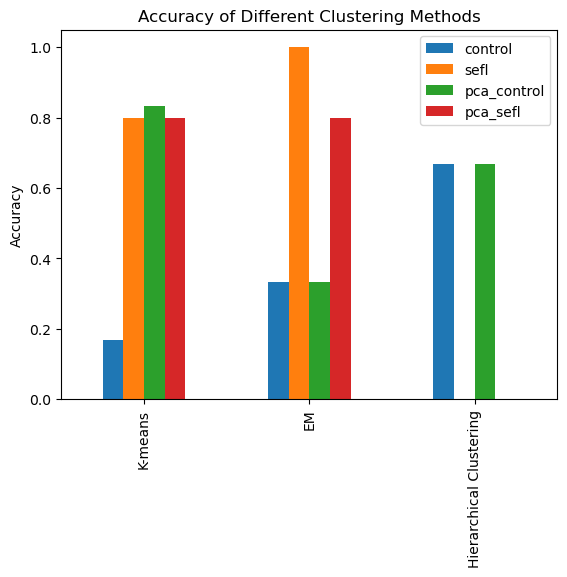

: 

In [56]:
## plot the accuracy
accuracy_df.plot(kind='bar')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Clustering Methods')
plt.show()

## whether the threshold 30 is a good one? result/mean/
## parameter ranking ***
## help Novak